In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
ds=pd.read_csv("AirPassengers.csv")
ds.head()

,Month,#Passengers
0,15-01-1949,112
1,15-02-1949,118
2,15-03-1949,132
3,15-04-1949,129
4,15-05-1949,121


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
ds=ds.set_index("Month")
ds.head()

,#Passengers
Month,
15-01-1949,112
15-02-1949,118
15-03-1949,132
15-04-1949,129
15-05-1949,121


# step 1 visualize the time series 
check for treand ,seasonality or random parrtens

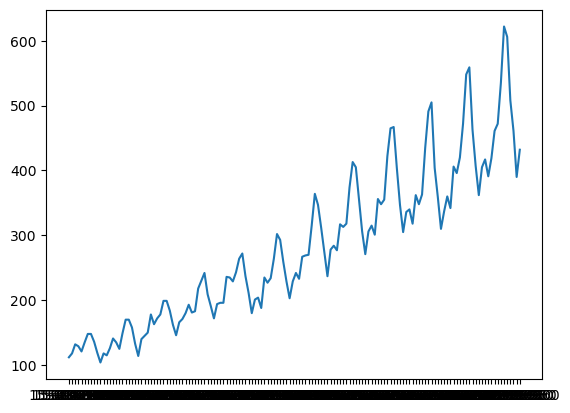

In [5]:
plt.plot(ds)
plt.show()

# step 2 check for stationarity
method rolling satstics

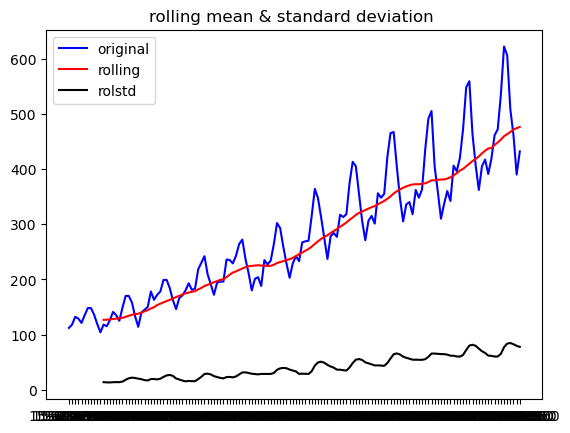

In [6]:
#determing rolling statistics 
rolmean=ds.rolling(window=12).mean()
rolstd=ds.rolling(window=12).std()

#plot rolling statistics
oring=plt.plot(ds,color="blue",label="original")
mean=plt.plot(rolmean,color="red",label="rolling")
std=plt.plot(rolstd,color="black",label="rolstd")
plt.title("rolling mean & standard deviation ")
plt.legend()
plt.show()

In [7]:
pip install stats

In [8]:
#method 2 ADF test
#ADF test-nullhypothesis -non statinary -if p-value <5% reject null hypothesis
from statsmodels.tsa.stattools import adfuller
adfuller_res= adfuller(ds["#Passengers"].values)
adfuller_res

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [9]:
print("p-value{}".format(adfuller_res[1]))

p-value0.9918802434376411


# the time series is not stationary 

# step 3 stationarize the time series 
differening 

In [10]:
#transformation 
ts_log=np.log(ds["#Passengers"])
#get the difference between the moving averge and the actuel number of passenger
ts_log_mvdiff=ts_log-ts_log.shift(2)
ts_log_mvdiff.head(15)

Month
15-01-1949         NaN
15-02-1949         NaN
15-03-1949    0.164303
15-04-1949    0.089128
15-05-1949   -0.087011
15-06-1949    0.045462
15-07-1949    0.201422
15-08-1949    0.091937
15-09-1949   -0.084557
15-10-1949   -0.218089
15-11-1949   -0.268264
15-12-1949   -0.008439
15-01-1950    0.100541
15-02-1950    0.065597
15-03-1950    0.203828
Name: #Passengers, dtype: float64

In [11]:
#remove nan value 
ts_log_mvdiff.dropna(inplace=True)
ts_log_mvdiff.head()

Month
15-03-1949    0.164303
15-04-1949    0.089128
15-05-1949   -0.087011
15-06-1949    0.045462
15-07-1949    0.201422
Name: #Passengers, dtype: float64

check for stationary 

# method 1 rolling statics 

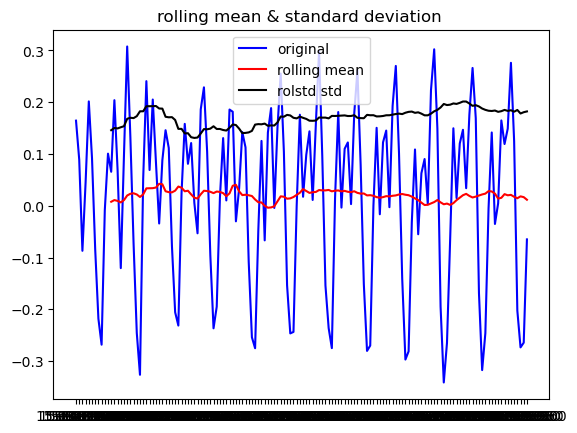

In [12]:
#determing rolling statistics 
rolmean=ts_log_mvdiff.rolling(window=12).mean()
rolstd=ts_log_mvdiff.rolling(window=12).std()

#plot rolling statistics
oring=plt.plot(ts_log_mvdiff,color="blue",label="original")
mean=plt.plot(rolmean,color="red",label="rolling mean")
std=plt.plot(rolstd,color="black",label="rolstd std ")
plt.title("rolling mean & standard deviation ")
plt.legend()
plt.show()

# meothd 2 ADF test

In [13]:
adfuller_res=adfuller(ts_log_mvdiff)
adfuller_res[1]

0.02191911456403927

now the time series is statinary

# step4 plot ACF/PACF and find p,d,q,parameters

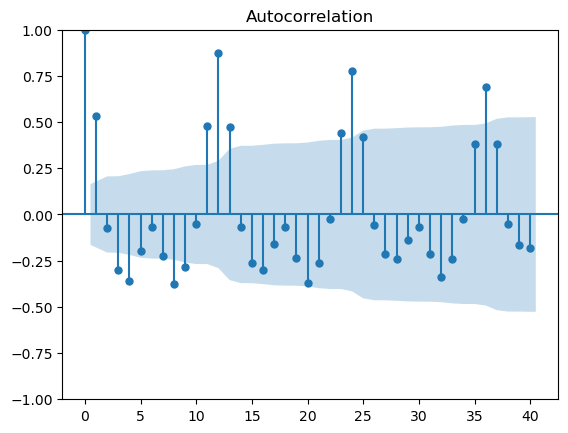

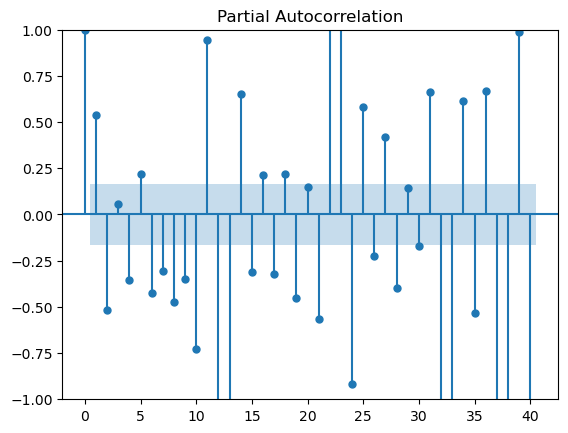

In [14]:
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm
fig=sm.graphics.tsa.plot_acf(ts_log_mvdiff,lags=40)
fig=sm.graphics.tsa.plot_pacf(ts_log_mvdiff,lags=40)



from ACF curve optimal value of q in the ARIMA model must be 1
from PACF curve optimal value  of p in the ARIMA model must be is 1

# step5 build ARIMA model

C:\Users\Rohit Jain\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rohit Jain\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rohit Jain\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


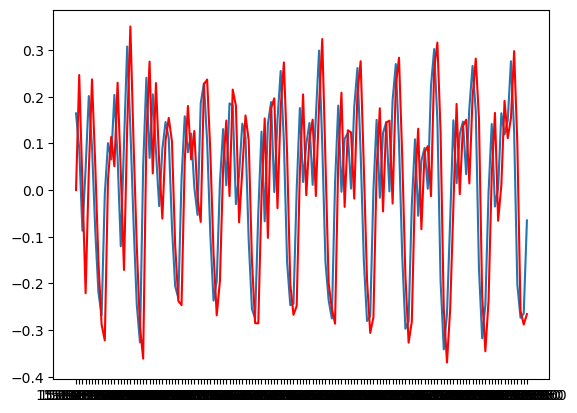

In [15]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(ts_log_mvdiff,order=(1,2,1))
res_arima=model.fit()
plt.plot(ts_log_mvdiff)
plt.plot(res_arima.fittedvalues,color="red")